In [1]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm the sufficient count
len(cities)

615

In [6]:
# Import the requests library
import requests

# Import the API Key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9408ee0f5837093998035c128c19755c


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
-------------------------------


In [10]:
# Loop through all of the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | te anau
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | mogadishu
Processing Record 8 of Set 1 | nampula
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | sakaiminato
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | cootamundra
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | san luis rio colorado
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | urumqi
Processing Record 21 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 22 of Set 1 | q

Processing Record 39 of Set 4 | rudnogorsk
Processing Record 40 of Set 4 | isugod
Processing Record 41 of Set 4 | martin
Processing Record 42 of Set 4 | touros
Processing Record 43 of Set 4 | baykit
Processing Record 44 of Set 4 | murgab
Processing Record 45 of Set 4 | geresk
City not found. Skipping...
Processing Record 46 of Set 4 | palauig
Processing Record 47 of Set 4 | turukhansk
Processing Record 48 of Set 4 | utevka
Processing Record 49 of Set 4 | muros
Processing Record 50 of Set 4 | camacha
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | bonthe
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | keti bandar
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | babanusah
City not found. Skipping...
Processing Record 8 of Set 5 | amuntai
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | east london
Processing Record 11 of Set 5 | pangody
Processing Re

Processing Record 22 of Set 8 | mihijam
Processing Record 23 of Set 8 | florence
Processing Record 24 of Set 8 | fresno
Processing Record 25 of Set 8 | chanal
Processing Record 26 of Set 8 | bom jesus da lapa
Processing Record 27 of Set 8 | namtsy
Processing Record 28 of Set 8 | bayan
Processing Record 29 of Set 8 | rungata
City not found. Skipping...
Processing Record 30 of Set 8 | santa cruz
Processing Record 31 of Set 8 | sabzevar
Processing Record 32 of Set 8 | komsomolskiy
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | chapais
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | mazatlan
Processing Record 38 of Set 8 | sinkat
City not found. Skipping...
Processing Record 39 of Set 8 | penha
Processing Record 40 of Set 8 | khani
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | krasnyy oktyabr
Processing Record 43 of Set 8 | usolye
Processing Record 44 of Set 8 | broome


Processing Record 11 of Set 12 | hirara
Processing Record 12 of Set 12 | tabuk
Processing Record 13 of Set 12 | waingapu
Processing Record 14 of Set 12 | matagami
Processing Record 15 of Set 12 | kyren
Processing Record 16 of Set 12 | olinda
Processing Record 17 of Set 12 | paamiut
Processing Record 18 of Set 12 | tirumullaivasal
Processing Record 19 of Set 12 | gigmoto
Processing Record 20 of Set 12 | aleksandrov gay
Processing Record 21 of Set 12 | itaituba
Processing Record 22 of Set 12 | pirovskoye
Processing Record 23 of Set 12 | lawang
Processing Record 24 of Set 12 | mehamn
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | middleton
Processing Record 27 of Set 12 | alekseyevka
Processing Record 28 of Set 12 | bull savanna
Processing Record 29 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 12 | innisfail
Processing Record 31 of Set 12 | higuey
City not found. Skipping...
Processing Record 32 of Set 12 | llano la

In [11]:
# Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in cets of 50 for logging purposes
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + "i"

In [12]:
print(len(city_data))

558


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.42,167.72,54.23,61,23,1.72,NZ,2020-08-24 01:54:07
1,Severo-Kurilsk,50.68,156.12,54.82,82,64,4.18,RU,2020-08-24 01:54:07
2,Rikitea,-23.12,-134.97,71.24,83,15,19.80,PF,2020-08-24 01:54:07
3,Vardo,70.37,31.11,53.22,92,100,8.59,NO,2020-08-24 01:54:07
4,Bluff,-46.60,168.33,60.01,71,44,5.01,NZ,2020-08-24 01:54:07
5,Mataura,-46.19,168.86,60.01,71,39,5.01,NZ,2020-08-24 01:54:08
6,Mogadishu,2.04,45.34,75.38,80,39,12.66,SO,2020-08-24 01:54:08
7,Nampula,-15.12,39.27,62.60,93,20,4.70,MZ,2020-08-24 01:54:08
8,Fortuna,40.60,-124.16,57.99,100,90,9.17,US,2020-08-24 01:53:00
9,Bredasdorp,-34.53,20.04,55.00,95,100,2.19,ZA,2020-08-24 01:54:09


In [14]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Te Anau,NZ,2020-08-24 01:54:07,-45.42,167.72,54.23,61,23,1.72
1,Severo-Kurilsk,RU,2020-08-24 01:54:07,50.68,156.12,54.82,82,64,4.18
2,Rikitea,PF,2020-08-24 01:54:07,-23.12,-134.97,71.24,83,15,19.80
3,Vardo,NO,2020-08-24 01:54:07,70.37,31.11,53.22,92,100,8.59
4,Bluff,NZ,2020-08-24 01:54:07,-46.60,168.33,60.01,71,44,5.01
5,Mataura,NZ,2020-08-24 01:54:08,-46.19,168.86,60.01,71,39,5.01
6,Mogadishu,SO,2020-08-24 01:54:08,2.04,45.34,75.38,80,39,12.66
7,Nampula,MZ,2020-08-24 01:54:08,-15.12,39.27,62.60,93,20,4.70
8,Fortuna,US,2020-08-24 01:53:00,40.60,-124.16,57.99,100,90,9.17
9,Bredasdorp,ZA,2020-08-24 01:54:09,-34.53,20.04,55.00,95,100,2.19


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from teh DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today

1598234203.6572356

In [18]:
today = time.strftime("%x")
today

'08/23/20'

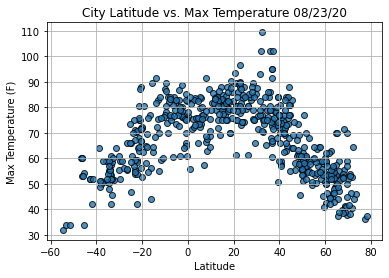

In [19]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

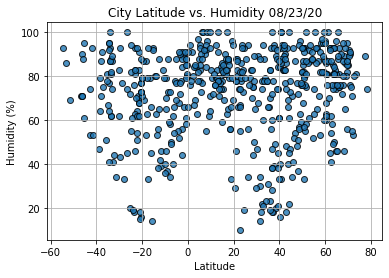

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

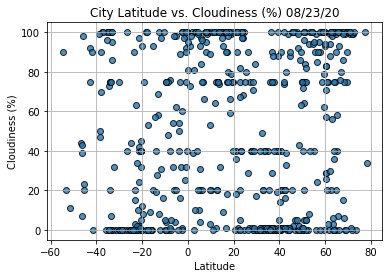

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

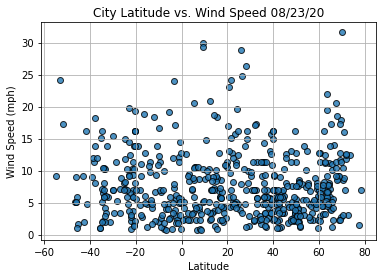

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Import the linear regression from SciPy stats module
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                  Cootamundra
Country                        AU
Date          2020-08-24 01:54:10
Lat                        -34.65
Lng                        148.03
Max Temp                       48
Humidity                       77
Cloudiness                     73
Wind Speed                   5.01
Name: 13, dtype: object

In [26]:
# Create Northern and Southen Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

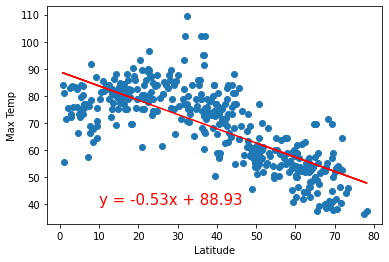

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,40))

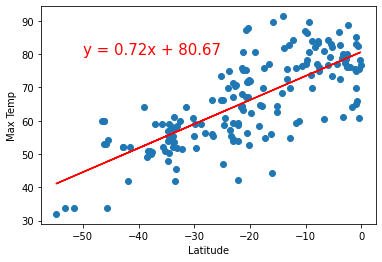

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,80))

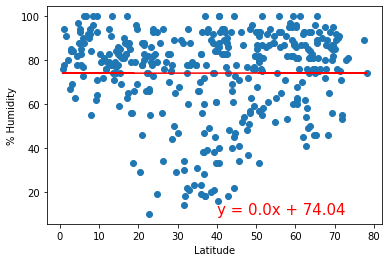

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

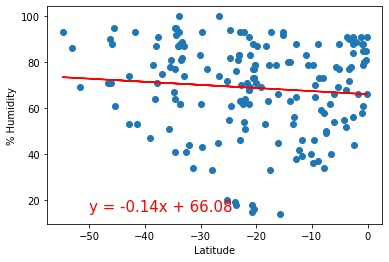

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

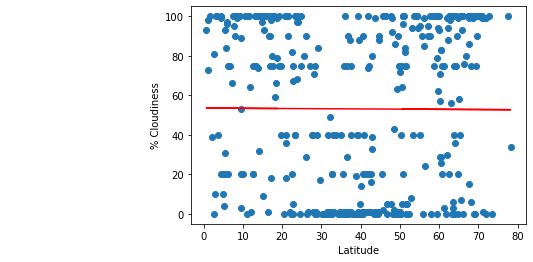

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

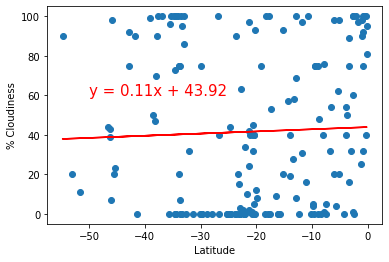

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

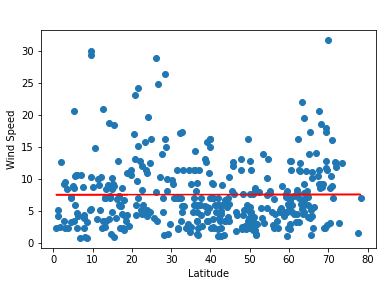

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

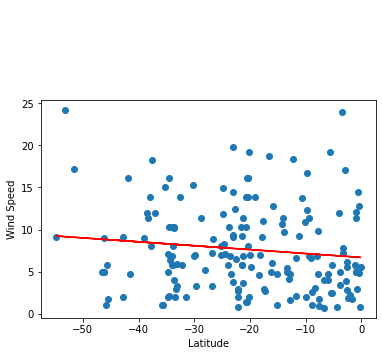

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))